In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,SimpleRNN
from tensorflow.keras import datasets
import matplotlib.pyplot as plt


In [2]:
(train_images,train_labels),(test_images,test_labels)=datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_images,test_images=train_images/255.0,test_images/255.0

In [4]:
class_names = ["Zero","One","Two","Three","Four","Five","Six","Seven","Eight","Nine"]

In [5]:
print("shape of training images:",train_images.shape)
print("shape of training labels:",train_labels.shape)
print("shape of testing images:",test_images.shape)
print("shape of testing labels:",test_labels.shape)

shape of training images: (60000, 28, 28)
shape of training labels: (60000,)
shape of testing images: (10000, 28, 28)
shape of testing labels: (10000,)


In [6]:
print(f"label values ranges from  {np.min(train_labels)} to {np.max(train_labels)} ")

label values ranges from  0 to 9 


pixel value ranges from 0.0 to 1.0


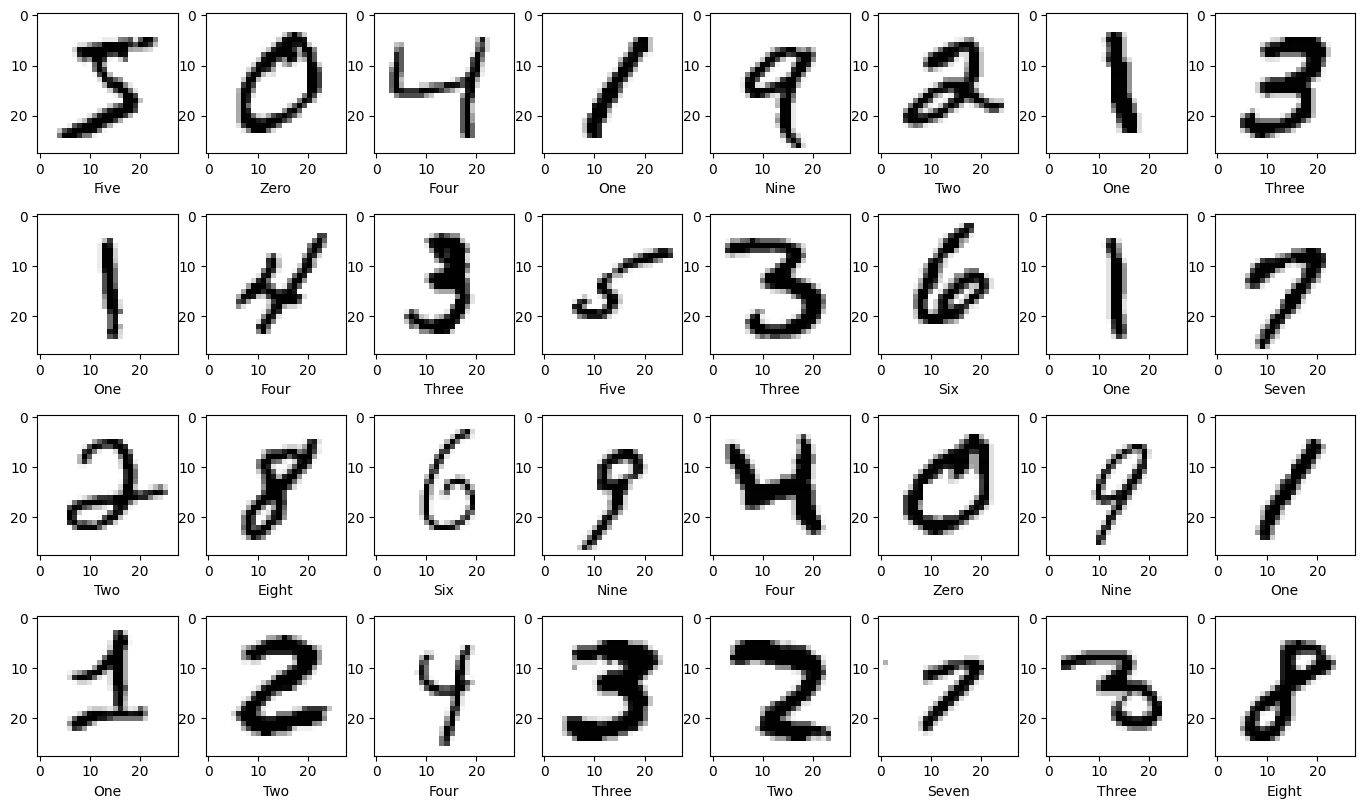

In [7]:
print(f"pixel value ranges from {np.min(train_images)} to {np.max(train_images)}")
plt.figure(figsize=(17,10))
for i in range(32):
  plt.subplot(4,8,i+1)
  plt.imshow(train_images[i],cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
  plt.grid(False)
plt.show()

In [8]:
#model 1 = SNN

In [9]:
model1 = Sequential()
model1.add(SimpleRNN(100,input_shape=(28,28)))
model1.add(Dense(10,activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
#model 2 = one layer LSTM


In [11]:
model2 = Sequential()
model2.add(LSTM(100,input_shape=(28,28)))
model2.add(Dense(10,activation="softmax"))

In [12]:
#model3 = multi layer LSTM

In [13]:
#firstlayer LSTM
model3 = tf.keras.models.Sequential()
model3.add(LSTM(units=128,activation="relu",input_shape=(28,28),return_sequences=True))
model3.add(tf.keras.layers.Dropout(0.2))
#second layer LSTM
model3.add(LSTM(units=128,activation="relu"))
model3.add(tf.keras.layers.Dropout(0.2))
#fully connected layer (first dense layer)
model3.add(Dense(units=32,activation="relu"))
model3.add(tf.keras.layers.Dropout(0.2))
#output layer
model3.add(Dense(units=10,activation="softmax"))


In [14]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,910 (54.34 KB)

 Trainable params: 13,910 (54.34 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          51,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,610 (205.51 KB)

 Trainable params: 52,610 (205.51 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 28, 128)             │          80,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 28, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 216,426 (845.41 KB)

 Trainable params: 216,426 (845.41 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model1.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=["accuracy"])
model2.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=["accuracy"])
model3.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=["accuracy"])

In [18]:
history1 = model1.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7855 - loss: 0.6674 - val_accuracy: 0.9322 - val_loss: 0.2406
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9347 - loss: 0.2207 - val_accuracy: 0.9586 - val_loss: 0.1476
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9480 - loss: 0.1835 - val_accuracy: 0.9513 - val_loss: 0.1717
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9536 - loss: 0.1645 - val_accuracy: 0.9621 - val_loss: 0.1353
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9590 - loss: 0.1455 - val_accuracy: 0.9666 - val_loss: 0.1148
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9619 - loss: 0.1360 - val_accuracy: 0.9497 - val_loss: 0.1790
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9612 - loss: 0.1358 - val_accuracy: 0.9656 - val_loss: 0.1233
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9648 - loss: 0.1

In [19]:
history2 = model2.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7733 - loss: 0.6832 - val_accuracy: 0.9549 - val_loss: 0.1400
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9657 - loss: 0.1164 - val_accuracy: 0.9725 - val_loss: 0.0943
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9759 - loss: 0.0800 - val_accuracy: 0.9769 - val_loss: 0.0715
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9814 - loss: 0.0608 - val_accuracy: 0.9818 - val_loss: 0.0590
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9847 - loss: 0.0492 - val_accuracy: 0.9793 - val_loss: 0.0651
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9885 - loss: 0.0372 - val_accuracy: 0.9838 - val_loss: 0.0507
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9897 - loss: 0.0337 - val_accuracy: 0.9818 - val_loss: 0.0550
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9913 - loss: 0.02

In [20]:
history3 = model3.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.5933 - loss: 1.1944 - val_accuracy: 0.9347 - val_loss: 0.2130
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 10ms/step - accuracy: 0.9433 - loss: 0.2068 - val_accuracy: 0.9693 - val_loss: 0.1040
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9660 - loss: 0.1263 - val_accuracy: 0.9800 - val_loss: 0.0703
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 11ms/step - accuracy: 0.9742 - loss: 0.0979 - val_accuracy: 0.9560 - val_loss: 0.1575
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9635 - loss: 0.1360 - val_accuracy: 0.9822 - val_loss: 0.0621
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9811 - loss: 0.0730 - val_accuracy: 0.9804 - val_loss: 0.0753
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.9815 - loss: 0.0665 - val_accuracy: 0.9824 - val_loss: 0.0589
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9838 -

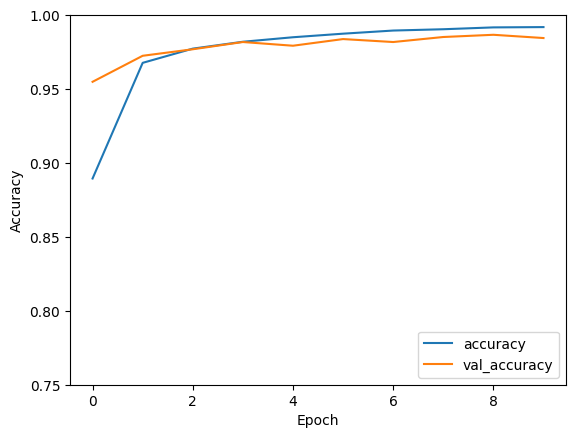

In [39]:
plt.plot(history2.history["accuracy"],label="accuracy")
plt.plot(history2.history["val_accuracy"],label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0.75,1])
plt.legend(loc="lower right")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


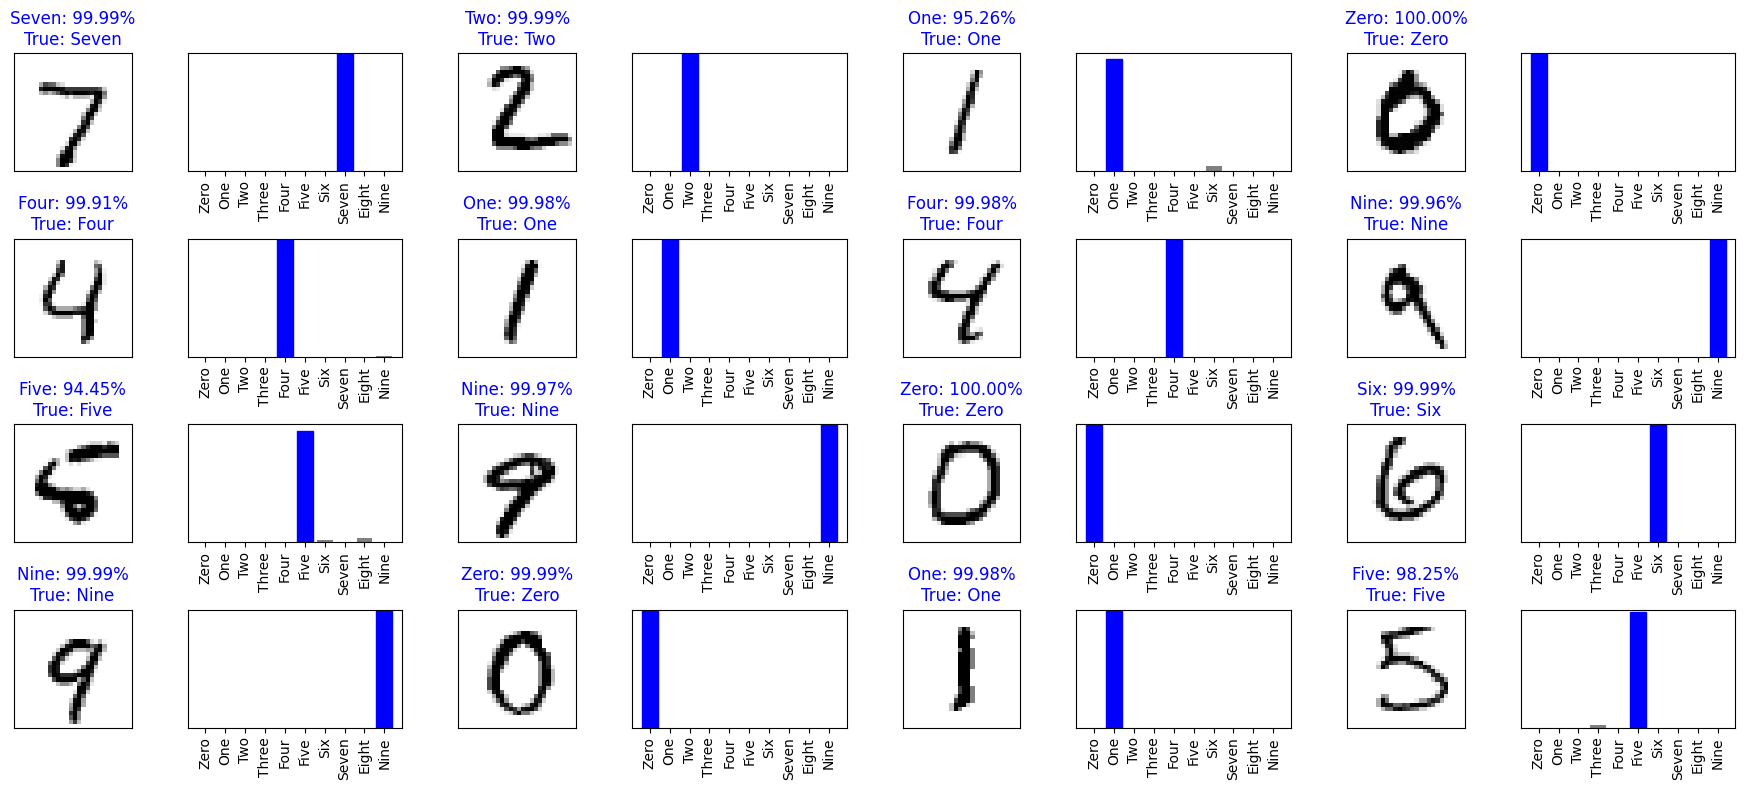

In [30]:
predictions = model2.predict(test_images)

plt.figure(figsize=(18, 8))
for i in range(16):
    plt.subplot(4, 8, 2*i+1)
    plt.xticks([])
    plt.yticks([])

    # Determine the color for correct/incorrect predictions
    color = "blue" if np.argmax(predictions[i]) == test_labels[i] else "red"

    # Show the image
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)

    # Display prediction and true label
    plt.title(f"{class_names[np.argmax(predictions[i])]}: {100*np.max(predictions[i]):.2f}%\nTrue: {class_names[test_labels[i]]}", color=color)

    # Plot the prediction bar chart
    plt.subplot(4, 8, 2*i+2)
    plt.xticks(range(10), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions[i], color="grey")
    plt.ylim([0, 1])
    thisplot[np.argmax(predictions[i])].set_color("red")
    thisplot[test_labels[i]].set_color("blue")

plt.tight_layout()
plt.show()

In [31]:
img = test_images[50]
print(img.shape)

(28, 28)


In [32]:
img= np.expand_dims(img,axis=0)
print(img.shape)

(1, 28, 28)


In [33]:
predictions_image = model2.predict(img)
max_confidence = np.argmax(predictions_image[0])
print(f"highest confidence is: {max_confidence}")
print(f"predicted label is: {class_names[max_confidence]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
highest confidence is: 6
predicted label is: Six


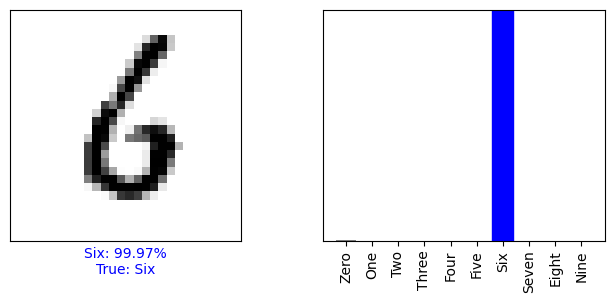

In [38]:
plt.figure(figsize=(8,3))
i=50
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
if np.argmax(predictions[i]) == test_labels[i]:
  color = "blue"
else:
  color = "red"
plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
plt.xlabel(f"{class_names[np.argmax(predictions[i])]}: {100*np.max(predictions[i]):.2f}%\nTrue: {class_names[test_labels[i]]}", color=color)
plt.subplot(1,2,2)
plt.xticks(range(10), class_names, rotation=90)
plt.yticks([])
thisplot = plt.bar(range(10), predictions[i], color="grey")
plt.ylim([0, 1])
thisplot[np.argmax(predictions[i])].set_color("red")
thisplot[test_labels[i]].set_color("blue")
plt.show()